In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sklearn.pipeline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import optuna
import pickle
import scipy

import yellowbrick
from yellowbrick.model_selection import LearningCurve

import sklearn
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, \
    QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts

import posture_detector
from posture_detector.constants import columns


In [ ]:
figure_path = '../images/'

In [4]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

# Load and parse dataset

In [5]:
data_location = 'data/raw/datalog_at_2021-07-04_19_07_28.038692'

In [6]:
df_raw = pd.read_csv('../' + data_location)
df_raw.head()

,Ax,Ay,Az,Temperature,gx,gy,gz,FlexSensor,Label
0,-0.187500,-0.883301,-0.452393,27.4947,1.90840,1.625950,-13.87790,562,NaN
1,-0.286377,-0.917725,-0.354248,27.4947,-4.64122,-1.694660,-4.77099,561,NaN
2,-0.350342,-0.951172,-0.354492,27.4947,-5.37405,-0.496183,1.30534,561,NaN
3,-0.303711,-0.922119,-0.364258,27.5888,-3.95420,0.015267,0.51145,561,NaN
4,-0.299561,-0.919678,-0.356934,27.4947,-2.96947,1.145040,5.68702,561,NaN


In [7]:
df = posture_detector.data.parse_dataset(df_raw)
df.head()

,Ax,Ay,Az,gx,gy,gz,FlexSensor,Label
982,-0.610840,-0.723877,-0.347656,-0.954198,2.297710,1.854960,573,0
983,-0.630127,-0.722168,-0.338867,-2.595420,1.358780,0.793893,572,0
984,-0.632568,-0.718506,-0.345459,-3.633590,0.656489,3.091600,572,0
985,-0.637451,-0.713135,-0.352051,-3.503820,1.648850,3.587790,574,0
986,-0.622559,-0.710938,-0.329834,-4.610690,-0.931298,2.435110,574,0


In [8]:
df


,Ax,Ay,Az,gx,gy,gz,FlexSensor,Label
982,-0.610840,-0.723877,-0.347656,-0.954198,2.297710,1.854960,573,0
983,-0.630127,-0.722168,-0.338867,-2.595420,1.358780,0.793893,572,0
984,-0.632568,-0.718506,-0.345459,-3.633590,0.656489,3.091600,572,0
985,-0.637451,-0.713135,-0.352051,-3.503820,1.648850,3.587790,574,0
986,-0.622559,-0.710938,-0.329834,-4.610690,-0.931298,2.435110,574,0
...,...,...,...,...,...,...,...,...
7897,-0.828857,-0.434326,-0.366699,-3.190840,-0.236641,3.351150,564,0
7898,-0.842773,-0.432861,-0.362305,-3.450380,0.809160,3.885500,564,0
7899,-0.856689,-0.433594,-0.362549,-3.496180,-0.580153,0.190840,562,0
7900,-0.833984,-0.422363,-0.367432,-4.580150,-0.251908,-0.335878,562,0


In [13]:
X, y = posture_detector.data.train_test.split_record_data(df.drop(columns=['gx', 'gy', 'gz']))


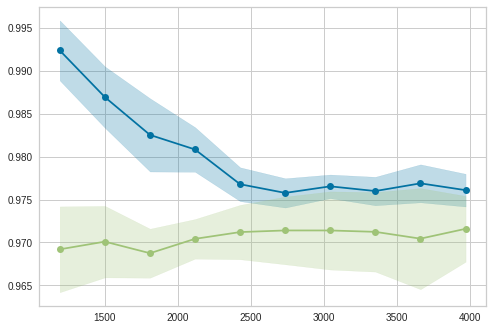

In [33]:
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    AdaBoostClassifier(),
    cv=5, scoring='f1', train_sizes=sizes,
    n_jobs=6
).fit(X, y)

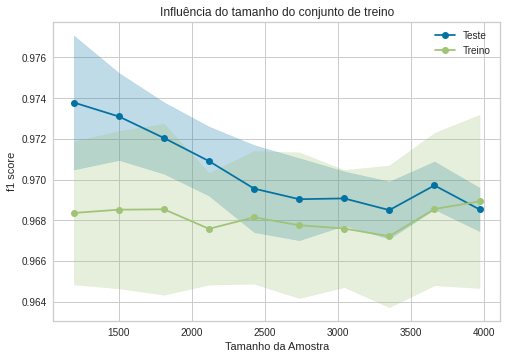

In [39]:
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    LinearDiscriminantAnalysis(),
    cv=5, scoring='f1', train_sizes=sizes,
    n_jobs=6
).fit(X, y)
plt.title('Influência do tamanho do conjunto de treino')
plt.legend(['Teste', 'Treino'])
plt.ylabel('f1 score')
plt.xlabel('Tamanho da Amostra')
plt.show()


In [29]:
visualizer.show()

<AxesSubplot:title={'center':'Learning Curve for LinearDiscriminantAnalysis'}, xlabel='Training Instances', ylabel='Score'>